In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'  # Usar Latin Modern Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Latin Modern Roman']
import numpy as np
from tensorflow import keras
#sns.set_style('dark')
plt.rcParams['font.size'] = 16
import json
import os
import copy
from IPython.display import display, HTML

# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

import scipy as sp
from scipy.optimize import curve_fit

import uproot
import awkward as ak

import awkward as ak
import matplotlib.pyplot as plt
import hist
import math
import numpy as np
import vector
import pylhe
import seaborn as sns
from matplotlib import colormaps

In [2]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [3]:
%pip install latex

Note: you may need to restart the kernel to use updated packages.


In [4]:
os.getcwd()

'/Users/esser/Documents/PROJECTS/ALPsPheno/ALP GLOBAL/github/notebooks'

# Signal events

## Read in the data

In [5]:
# run_02: with cut in $m_{\gamma \gamma} > 200$ GeV
# run_08: no cut in $m_{\gamma \gamma}$

fileg = "../MadGraph/ppaxgammagamma/Events/run_08/unweighted_events.lhe"
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(fileg))

Identify the particles

In [6]:
g1=events.particles.vector[:,0]
g2=events.particles.vector[:,1]
ga1=events.particles.vector[:,-1]
ga2=events.particles.vector[:,-2]

gatot=ga1+ga2

Function to read in the total cross section and total number of events from the lhe file. Note that for different processes the rows may shift.

In [7]:
def read_sigma_nevents(filename):
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[391].split(' ')[13])
    nevents = float(data[149].split(' ')[2])
    return sigma, nevents

In [8]:
(sigma, Ntot) = read_sigma_nevents(fileg)

In [9]:
sigma

7.520500628842906

## Data Visualisation!

In [10]:
# the cut in the invariant mass works
min(gatot.mass)

80.18867501155701

Plot the distribution for the invariant mass $m_{\gamma \gamma}$

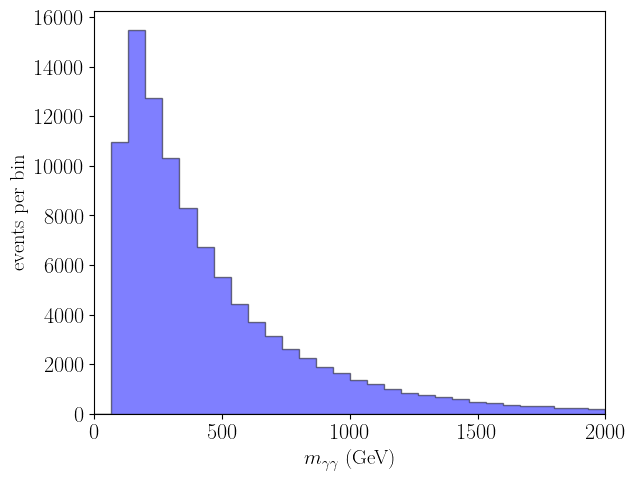

In [11]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n, bins, _ =plt.hist(gatot.mass,bins=30,range=(0,2000),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(0, 2000)
plt.tight_layout()
#plt.title(r'$m_{\gamma \gamma}$ ',fontsize=15)
plt.xlabel(r'$m_{\gamma \gamma}$ (GeV)',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mgammagamma.pdf")
plt.show()

In [12]:
n.sum()

98654.0

In [13]:
n.sum()/Ntot

0.98654

In [14]:
(ga1+ga2).pt

<Array [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='100000 * float64'>

The transverse part of $\gamma_1$ is always minus the transverse part of $\gamma_2$.

In [15]:
max(ga1.pt)

2774.131408678528

In [16]:
min(ga2.pt)

40.00047459917254

In [17]:
ga1[0:10]

<MomentumArray4D [{x: -225, y: 61, z: -335, ...}, ...] type='10 * Momentum4...'>

In [18]:
ga2[0:10]

<MomentumArray4D [{x: 225, y: -61, z: -699, ...}, ...] type='10 * Momentum4...'>

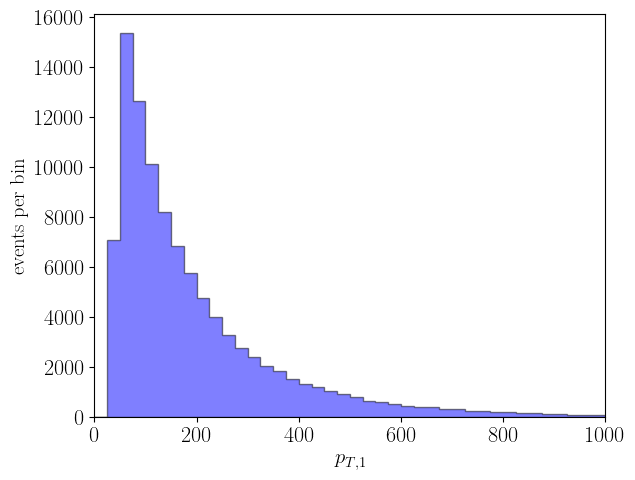

In [19]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n_pt, bins_pt, _ =plt.hist(ga1.pt,bins=40,range=(0,1000),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(0, 1000)
plt.tight_layout()
plt.xlabel(r'$p_{T,1}$ ',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mgammagamma.pdf")
plt.show()

In [20]:
n_pt.sum()

99271.0

Distribution in $\Delta R_{\gamma \gamma}$: The photons are well separated, even though we only applied a cut of $\Delta R_{\gamma \gamma} > 0.4$

In [21]:
min(ga1.deltaR(ga2))

3.141592653602353

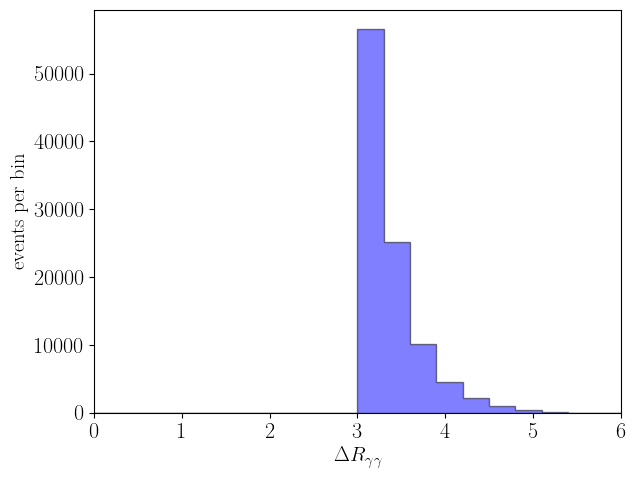

In [22]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n_dR, bins_dR, _ =plt.hist(ga1.deltaR(ga2),bins=20,range=(0,6),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(0, 6)
plt.tight_layout()
plt.xlabel(r'$\Delta R_{\gamma \gamma}$ ',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mgammagamma.pdf")
plt.show()

In [23]:
max(ga1.rapidity)

2.3698579578164307

In [24]:
max(ga2.rapidity)

2.369966908540816

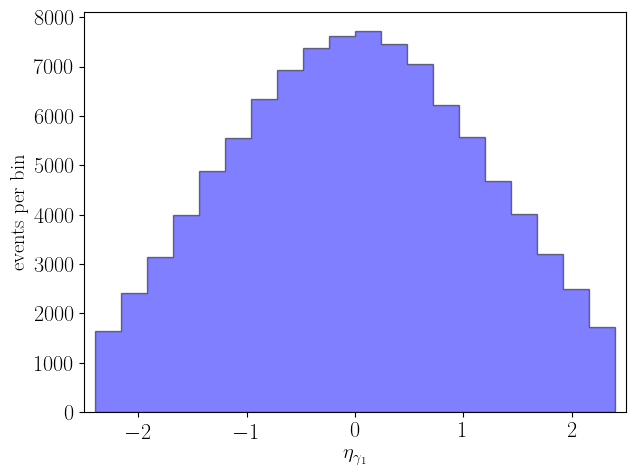

In [25]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n_eta, bins_eta, _ =plt.hist(ga1.rapidity,bins=20,range=(-2.4,2.4),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(-2.5, 2.5)
plt.tight_layout()
plt.xlabel(r'$\eta_{\gamma_1}$ ',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mgammagamma.pdf")
plt.show()

In [26]:
n_eta.sum()

100000.0

# Invariant mass $𝑚_{\gamma \gamma}$ distribution

## Read in data and background from Fig. 11c

In [27]:
#data (rows 10-80)
raw_data = pd.read_csv('../MadGraph/ppaxgammagamma/data_gammagamma.csv', sep=',', nrows=71, header=8).values

In [28]:
len(raw_data)

71

In [29]:
raw_data[-1,0]

7010.0

In [30]:
mgaga_bin_center = raw_data[:,0]

In [31]:
mgaga_bin_center

array([  16.75,   21.3 ,   23.8 ,   26.  ,   28.05,   30.05,   32.1 ,
         34.3 ,   36.6 ,   39.1 ,   41.7 ,   44.5 ,   47.5 ,   50.7 ,
         54.1 ,   57.7 ,   61.5 ,   65.5 ,   69.9 ,   74.6 ,   79.5 ,
         84.75,   90.25,   96.  ,  102.  ,  108.5 ,  115.25,  122.25,
        129.75,  137.25,  145.25,  153.75,  162.25,  171.  ,  180.25,
        189.75,  199.75,  210.  ,  220.5 ,  232.  ,  243.5 ,  255.5 ,
        268.  ,  280.5 ,  294.  ,  308.  ,  322.5 ,  337.5 ,  353.  ,
        369.  ,  385.5 ,  402.5 ,  420.  ,  438.5 ,  457.5 ,  477.  ,
        497.5 ,  519.  ,  541.  ,  563.  ,  586.  ,  610.  ,  635.  ,
        661.  ,  687.  ,  716.  ,  752.  ,  798.5 ,  862.5 ,  960.  ,
       7010.  ])

In [32]:
mgaga_bin_lower=raw_data[:,1]

In [33]:
mgaga_bin_upper=raw_data[:,2]

In [34]:
mgaga_bins = np.append(mgaga_bin_lower, mgaga_bin_upper[-1])

In [35]:
mgaga_bins

array([   13.5,    20. ,    22.6,    25. ,    27. ,    29.1,    31. ,
          33.2,    35.4,    37.8,    40.4,    43. ,    46. ,    49. ,
          52.4,    55.8,    59.6,    63.4,    67.6,    72.2,    77. ,
          82. ,    87.5,    93. ,    99. ,   105. ,   112. ,   118.5,
         126. ,   133.5,   141. ,   149.5,   158. ,   166.5,   175.5,
         185. ,   194.5,   205. ,   215. ,   226. ,   238. ,   249. ,
         262. ,   274. ,   287. ,   301. ,   315. ,   330. ,   345. ,
         361. ,   377. ,   394. ,   411. ,   429. ,   448. ,   467. ,
         487. ,   508. ,   530. ,   552. ,   574. ,   598. ,   622. ,
         648. ,   674. ,   700. ,   732. ,   772. ,   825. ,   900. ,
        1020. , 13000. ])

In [36]:
mgaga_bin_center[21]

84.75

In [37]:
len(mgaga_bin_center)

71

In [38]:
data = raw_data[:,3]

In [39]:
len(data)

71

In [40]:
print(data)

[8.1029e-03 1.8777e-02 2.3359e-02 2.3018e-02 2.9642e-02 2.8385e-02
 3.1855e-02 3.4818e-02 3.6239e-02 3.3201e-02 3.3410e-02 4.0789e-02
 4.1639e-02 4.6459e-02 4.6581e-02 5.5883e-02 6.1784e-02 7.6128e-02
 1.2166e-01 2.5495e-01 3.8486e-01 4.2810e-01 4.2035e-01 3.8503e-01
 3.4085e-01 2.9805e-01 2.6119e-01 2.3047e-01 1.9566e-01 1.5638e-01
 1.3549e-01 1.1357e-01 9.5813e-02 8.0987e-02 6.8060e-02 5.7413e-02
 4.7718e-02 3.9756e-02 3.2742e-02 2.8390e-02 2.3032e-02 1.9383e-02
 1.6359e-02 1.3345e-02 1.1714e-02 9.4913e-03 8.0543e-03 6.7986e-03
 5.6124e-03 4.6797e-03 3.7002e-03 3.2789e-03 2.7735e-03 2.1960e-03
 1.8226e-03 1.5456e-03 1.3746e-03 1.1750e-03 8.2160e-04 7.6731e-04
 6.5148e-04 5.3129e-04 3.8804e-04 3.6501e-04 2.9556e-04 2.7553e-04
 2.0955e-04 1.3774e-04 1.1936e-04 6.3375e-05 7.8519e-07]


In [41]:
# take for time being only the statistical uncertainty
data_unc = raw_data[:,-2]

In [42]:
print(data_unc)

[1.0996e-03 2.3062e-03 2.0194e-03 2.7140e-03 2.3449e-03 2.4879e-03
 2.2773e-03 2.1061e-03 2.2588e-03 2.1395e-03 2.6504e-03 1.9896e-03
 1.9875e-03 1.7705e-03 2.0805e-03 2.1217e-03 2.0595e-03 1.9631e-03
 3.0490e-03 4.0742e-03 4.2627e-03 4.7240e-03 4.2589e-03 4.0202e-03
 3.5893e-03 2.3245e-03 2.8523e-03 2.2125e-03 1.8497e-03 1.5680e-03
 1.4216e-03 1.1951e-03 1.2343e-03 8.5693e-04 9.3765e-04 7.7839e-04
 5.8390e-04 6.4166e-04 5.6186e-04 4.9018e-04 5.0571e-04 3.6955e-04
 3.9461e-04 3.7173e-04 2.7469e-04 2.8168e-04 2.4850e-04 1.9017e-04
 1.5008e-04 1.6411e-04 1.2918e-04 1.3498e-04 1.0799e-04 8.9560e-05
 7.7861e-05 8.0691e-05 6.4596e-05 6.2690e-05 5.3697e-05 5.2731e-05
 4.4382e-05 3.8631e-05 3.8113e-05 2.7932e-05 3.1849e-05 1.6751e-05
 1.5775e-05 1.0804e-05 6.3330e-06 4.9955e-06 6.4329e-08]


In [43]:
data+data_unc

array([9.202500e-03, 2.108320e-02, 2.537840e-02, 2.573200e-02,
       3.198690e-02, 3.087290e-02, 3.413230e-02, 3.692410e-02,
       3.849780e-02, 3.534050e-02, 3.606040e-02, 4.277860e-02,
       4.362650e-02, 4.822950e-02, 4.866150e-02, 5.800470e-02,
       6.384350e-02, 7.809110e-02, 1.247090e-01, 2.590242e-01,
       3.891227e-01, 4.328240e-01, 4.246089e-01, 3.890502e-01,
       3.444393e-01, 3.003745e-01, 2.640423e-01, 2.326825e-01,
       1.975097e-01, 1.579480e-01, 1.369116e-01, 1.147651e-01,
       9.704730e-02, 8.184393e-02, 6.899765e-02, 5.819139e-02,
       4.830190e-02, 4.039766e-02, 3.330386e-02, 2.888018e-02,
       2.353771e-02, 1.975255e-02, 1.675361e-02, 1.371673e-02,
       1.198869e-02, 9.772980e-03, 8.302800e-03, 6.988770e-03,
       5.762480e-03, 4.843810e-03, 3.829380e-03, 3.413880e-03,
       2.881490e-03, 2.285560e-03, 1.900461e-03, 1.626291e-03,
       1.439196e-03, 1.237690e-03, 8.752970e-04, 8.200410e-04,
       6.958620e-04, 5.699210e-04, 4.261530e-04, 3.9294

In [44]:
#background, take SHERPA (rows 84-154)
raw_background = pd.read_csv('../MadGraph/ppaxgammagamma/data_gammagamma.csv', sep=',', nrows=71, header=81).values

In [45]:
background = raw_background[:,3]

In [46]:
print(background)

[1.1957e-02 2.8523e-02 3.3210e-02 3.5505e-02 3.7554e-02 3.9199e-02
 4.0080e-02 4.1043e-02 4.2365e-02 4.3168e-02 4.4496e-02 4.5559e-02
 4.7238e-02 4.9788e-02 5.3631e-02 6.0367e-02 7.0323e-02 8.7106e-02
 1.3979e-01 2.6794e-01 3.8993e-01 4.3771e-01 4.3397e-01 4.0713e-01
 3.6729e-01 3.2250e-01 2.7890e-01 2.3908e-01 2.0201e-01 1.7067e-01
 1.4340e-01 1.1954e-01 9.9349e-02 8.3245e-02 7.1280e-02 5.9191e-02
 4.9340e-02 4.0925e-02 3.4344e-02 2.8365e-02 2.3557e-02 1.9626e-02
 1.6266e-02 1.3604e-02 1.1297e-02 9.5297e-03 7.8720e-03 6.5990e-03
 5.4891e-03 4.5219e-03 3.8017e-03 3.1528e-03 2.6685e-03 2.1883e-03
 1.8048e-03 1.5260e-03 1.2865e-03 1.0259e-03 8.6850e-04 7.2488e-04
 5.9818e-04 4.9894e-04 4.1692e-04 3.5470e-04 2.9278e-04 2.2567e-04
 1.8890e-04 1.3962e-04 9.6392e-05 5.5331e-05 7.9661e-07]


In [47]:
background_unc = raw_background[:,4]

In [48]:
background_unc;

<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34283/3330385039.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$m_{\gamma\gamma}$ (GeV) ')
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34283/3330385039.py:8: SyntaxWarning: invalid escape sequence '\g'
  plt.title("Data and background distribution in $m_{\gamma \gamma}$")


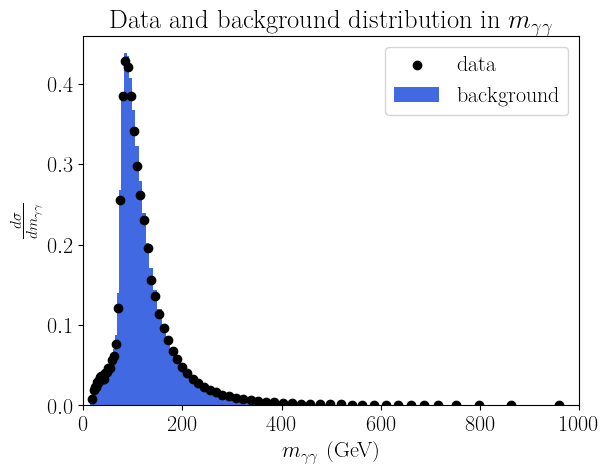

In [49]:
plt.bar(mgaga_bins[:-1], background, width=np.diff(mgaga_bins), align='edge', alpha=1, color='royalblue',label='background')
#plt.bar(mgaga_bins[:-1], background_unc, width=np.diff(mgaga_bins), align='edge', alpha=0.3, color='royalblue',label='background unc')
plt.scatter(mgaga_bin_center, data, color='black', label='data')
plt.xlim(0,1000)
plt.errorbar(mgaga_bin_center, data, data_unc, color='black', alpha=1,fmt='none')
plt.xlabel('$m_{\gamma\gamma}$ (GeV) ')
plt.ylabel(r'$\frac{d \sigma}{d m_{\gamma \gamma}}$')
plt.title("Data and background distribution in $m_{\gamma \gamma}$")
plt.legend()

## Histogram with signal events in the right binning

In [50]:
# The last bin looks so empty because we plot density=True, meaning that we divide by the bin width. The last bin is just so wide!
# However, we need to use 13000 as the upper edge to include all events.

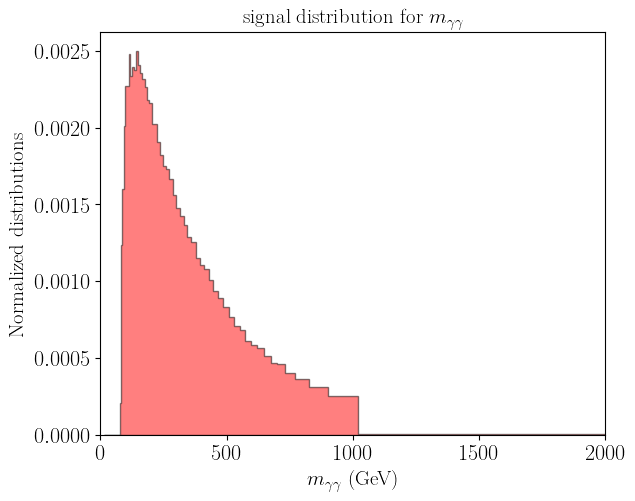

In [51]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins))
n_signal, bins, _ =plt.hist(gatot.mass,bins=mgaga_bins,range=(0,13000),label='non-linear axion', alpha=0.5,density=True ,color = "red", ec="k",histtype='stepfilled',log=False)
plt.xlim(0, 2000)
plt.tight_layout()
plt.title(r'signal distribution for $m_{\gamma\gamma}$ ',fontsize=15)
plt.xlabel(r'$m_{\gamma \gamma}$ (GeV)',fontsize=15)
plt.ylabel(r'Normalized distributions',fontsize=15)
#plt.savefig("mHHdist.pdf")
plt.show()

In [52]:
(n_signal*np.diff(mgaga_bins)).sum()

1.0

In [53]:
n_signal

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.08000000e-04, 1.23636364e-03, 1.60181818e-03, 2.01000000e-03,
       2.27166667e-03, 2.26857143e-03, 2.47846154e-03, 2.33466667e-03,
       2.39733333e-03, 2.37333333e-03, 2.49882353e-03, 2.41058824e-03,
       2.35764706e-03, 2.31444444e-03, 2.26842105e-03, 2.18000000e-03,
       2.16000000e-03, 2.02700000e-03, 2.02727273e-03, 1.90416667e-03,
       1.82090909e-03, 1.75000000e-03, 1.73250000e-03, 1.66538462e-03,
       1.56357143e-03, 1.47785714e-03, 1.42533333e-03, 1.36533333e-03,
       1.29000000e-03, 1.25250000e-03, 1.14882353e-03, 1.10764706e-03,
       1.07666667e-03, 1.00578947e-03, 9.34736842e-04, 8.91500000e-04,
      

ATLAS also gives the data and background in events per bin and per bin width, meaning that we do not have to multiply with the bin width to compare the signal.

## Compare signal with data and background


In [54]:
# rescale the MG5 signal events to compare with the data: N_events = n_events * L * sigma * acc
# acc = acceptence to the phase space cuts = number of events that pass the cuts / number of all events
# sigma in lhe file: total cross section including BR (unless we generate the process with decaying the Higgses or Z), sigma in pb
# cross check with more severe cuts that sigma * acc is the same

# lumi = 140 (fb)^(-1) = 140 e3 (pb)^(-1)
lumi = 139e3
acc = 1  # no post selection cuts
N_events = n_signal * lumi * sigma * acc

<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34283/3165096519.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$m_{\gamma\gamma}$ (GeV)',fontsize=15)
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34283/3165096519.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$m_{\gamma\gamma}$ (GeV)',fontsize=15)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/esser/Documents/PROJECTS/ALPsPheno/ALP multibosons/Figures/gammagamma.pdf'

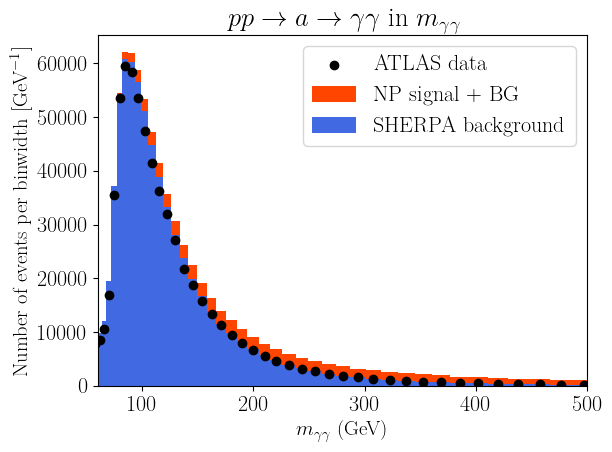

In [55]:
plt.bar(bins[:-1], background*lumi+n_signal*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
#plt.bar(bins[:-1], n_norm*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
plt.bar(bins[:-1], background*lumi, width=np.diff(bins), align='edge', alpha=1, color='royalblue',label='SHERPA background')
plt.xlim(60, 500)
#plt.ylim(0,10000)
plt.xlabel('$m_{\gamma\gamma}$ (GeV)',fontsize=15)
plt.ylabel(r'Number of events per binwidth [GeV$^{-1}$]',fontsize=15)
plt.errorbar(mgaga_bin_center, data*lumi, data_unc*lumi, color='black', alpha=1,fmt='none')
plt.scatter(mgaga_bin_center, data*lumi, color='black', label='ATLAS data')
plt.legend()
plt.title(r"$p p \rightarrow a \rightarrow \gamma \gamma$ in $m_{\gamma \gamma}$")
plt.tight_layout()
plt.savefig("/Users/esser/Documents/PROJECTS/ALPsPheno/ALP multibosons/Figures/gammagamma.pdf")
plt.show()

In [ ]:
plt.bar(bins[:-1],n_signal*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
#plt.bar(bins[:-1], n_norm*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
#plt.bar(bins[:-1], background*lumi, width=np.diff(bins), align='edge', alpha=1, color='royalblue',label='SHERPA background')
plt.xlim(80, 1000)
#plt.ylim(0,10000)
plt.xlabel('$m_{\gamma\gamma}$ (GeV)',fontsize=15)
plt.ylabel('Number of events',fontsize=15)
#plt.errorbar(bin_center, data*lumi*sigma_SM, [Lower*lumi*sigma_SM, Upper*lumi*sigma_SM], color='black', alpha=1,fmt='none')
#plt.scatter(mgaga_bin_center, data*lumi, color='black', label='ATLAS data')
plt.legend()
plt.title(r"$ALP \rightarrow \gamma \gamma$ in $m_{\gamma \gamma}$")
plt.tight_layout()
#plt.savefig("/Users/esser/Documents/PROJECTS/ALPsPheno/ALP multibosons/Figures/gammagamma.pdf")
plt.show()

### Output data to Mathematica

In [ ]:
# data
Mathematica_data = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data[21:]]) + "}" + ";"
print(Mathematica_data)

In [ ]:
len(mgaga_bin_center[21:])

In [ ]:
# data
Mathematica_data_unc = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data_unc[21:]]) + "}" ";"
print(Mathematica_data_unc)

In [ ]:
# background
Mathematica_background = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in background[21:]]) + "}" ";"
print(Mathematica_background)

In [ ]:
# signal
N_signal = n_signal * sigma
Mathematica_signal = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in N_signal[21:]]) + "}" ";"
print(Mathematica_signal)

In [ ]:
# bin center
Mathematica_bin_center = "{" + ",".join(["{:.0f}".format(x) for x in mgaga_bin_center[20:]]) + "}" ";"
print(Mathematica_bin_center)

### $pp \rightarrow \gamma \gamma, NP==2$

In [ ]:
fileg2 = "../MadGraph/ppgammagamma_NP/Events/run_01/unweighted_events.lhe"
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(fileg2))

In [ ]:
g1=events.particles.vector[:,0]
g2=events.particles.vector[:,1]
ga1=events.particles.vector[:,-1]
ga2=events.particles.vector[:,-2]

gatot=ga1+ga2

In [ ]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n, bins, _ =plt.hist(gatot.mass,bins=30,range=(0,2000),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(0, 2000)
plt.tight_layout()
#plt.title(r'$m_{\gamma \gamma}$ ',fontsize=15)
plt.xlabel(r'$m_{\gamma \gamma}$ (GeV)',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mgammagamma.pdf")
plt.show()

In [ ]:
min(gatot.mass)

In [ ]:
min(ga1.deltaR(ga2))